# Packages

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file


In [41]:
# 308891
data = pd.read_csv('../feature_data/HappyGo_NOV_DEC.csv', index_col=0)

In [42]:
feature_cols = ['INV_total_amount',
       'INV_avg_amount', 'INV_count', 'INV_seller_count', 'INV_industry_count',
       'INV_time_avg_period', 'APP_participate_count', 'APP_bnnr_count', 'APP_game_count',
       'APP_time_avg_period', 'TXN_total_count', 'TXN_earn_count', 'TXN_redeem_count',
       'TXN_total_point', 'TXN_earn_point', 'TXN_redeem_point', 'TXN_industry_count',
       'TXN_time_avg_period']

In [43]:
# 先刪除空值，試跑模型
# 238904
data_rm_nan = data[feature_cols].dropna().reset_index(drop=True)

In [44]:
mask1 = (data_rm_nan['INV_time_avg_period']!= -1)
mask2 = (data_rm_nan['APP_time_avg_period']!= -1)
mask3 = (data_rm_nan['TXN_time_avg_period']!= -1)

data_rm_nan = data_rm_nan[mask1&mask2&mask3]
data_rm_nan['TXN_redeem_point'] = abs(data_rm_nan['TXN_redeem_point'])

In [45]:
from feature_engine import transformation as vt

data_rm_nan
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['INV_total_amount', 'INV_avg_amount', 'INV_count', 'INV_seller_count',
       'INV_industry_count', 'INV_time_avg_period', 'APP_participate_count',
       'APP_bnnr_count', 'APP_game_count', 'APP_time_avg_period',
       'TXN_total_count', 'TXN_earn_count', 'TXN_redeem_count',
       'TXN_total_point', 'TXN_earn_point', 'TXN_redeem_point',
       'TXN_industry_count', 'TXN_time_avg_period'])
# fit the transformer
tf.fit(data_rm_nan)
data_rm_nan_t= tf.transform(data_rm_nan)

# Standardization & PCA

In [46]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data_rm_nan_t)

In [47]:
pca = PCA()
pca.fit(data_std)
#pd.DataFrame(abs(pca.components_), columns=feature_cols)

# 累積貢獻比率：前幾個主成份可以表示原始資料多少百分比的變異量
pca.explained_variance_ratio_.cumsum()

array([0.24850538, 0.4473596 , 0.56965254, 0.65441403, 0.72437481,
       0.77715554, 0.82717644, 0.87184664, 0.90196094, 0.92966256,
       0.95381471, 0.97021717, 0.98219515, 0.98990972, 0.99379331,
       0.99735767, 0.9992855 , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

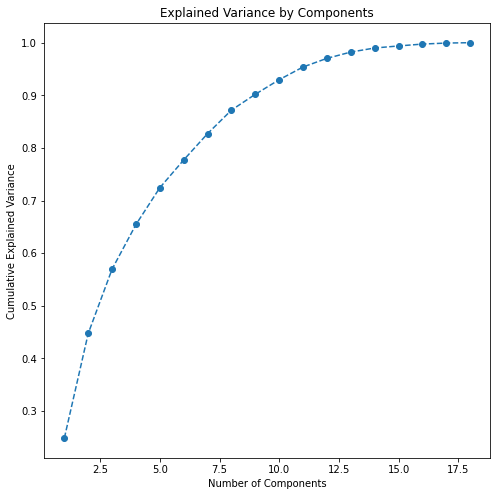

In [48]:
plt.figure(figsize = (8,8))
plt.plot(range(1,len(feature_cols)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle= '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [49]:
pca = PCA(n_components = 9)
pca.fit(data_std)

data_pca = pca.transform(data_std)

In [50]:
# len(data_pca)

# Build the Birch model

In [51]:
# #parameter setting
# best_CH_score = 0 # calinski_harabasz_score
# best_n = 0 # the number of clusters
# best_T = 0 # Maximum radius of CF
# best_b = 0 # Maximum number of CF subclusters

# for n in [10, 20, 30]:
#     for T in [0.5, 0.7, 0.9]:
#         for b in [10000, 15000, 20000]:
#             model = Birch(threshold=T, branching_factor=b, n_clusters=n)
#             model.fit(data_pca)
#             labels = model.fit_predict(data_pca)
#             CH_score = metrics.calinski_harabasz_score(data_pca, labels)
#             if CH_score > best_CH_score:
#                 best_n = n
#                 best_T = T
#                 best_b = b
#                 best_CH_score = CH_score
#             print(n, T, b, 'done')
# print('best_CH_score: ', best_CH_score)
# print('best n: ', best_n)
# print('best T: ', best_T)
# print('best b: ', best_b)

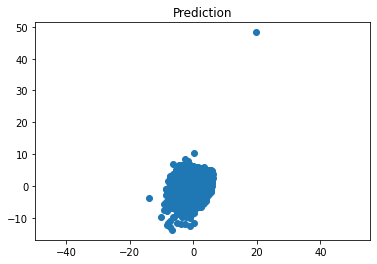

In [52]:
plt.figure()
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.axis('equal')
plt.title('Prediction')
#plt.savefig('1.jpg', transparent=True)
plt.show()

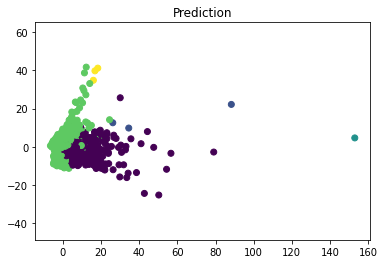

In [ ]:
# plt.figure()
# plt.scatter(data_pca[:,0], data_pca[:,1], c = labels)
# plt.axis('equal')
# plt.title('Prediction')
# #plt.savefig('1.jpg', transparent=True)
# plt.show()

In [ ]:
data_rm_nan['label'].value_counts()